In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb

In [2]:
df=pd.read_csv(r"C:\Users\gandh\Downloads\Datasets\humana\TAMU_FINAL_DATASET_2018\TAMU_FINAL_DATASET_2018.csv")

In [3]:
df.shape

(100000, 448)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


In [5]:
df.head(1)

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#list of columns that contain null values
l=df.columns[df.isna().any()].tolist()

In [7]:
#List of columns that have only one value
singlevaluedcol=[]
for i in df.columns:
    if df[i].nunique==1:
        singlevaluedcol.append(i)
        

In [8]:
#Creating a dictionary to identify Column names as keys and number of null values in the column as the corresponding value
d={}
for i in l:
    d[i]=len(df[df[i].isnull()])

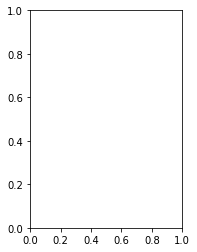

In [9]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)

Text(0.5,1,'Number of Members males or females in the dataset')

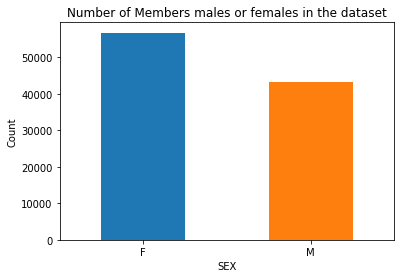

In [10]:
#Plot for Male and female count for humana members
df.groupby('SEX_CD').count()['ID'].plot.bar()
plt.xlabel("SEX")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Number of Members males or females in the dataset")
#df.groupby(['SEX_CD','AMI_FLAG']).count()['ID'].plot.bar()

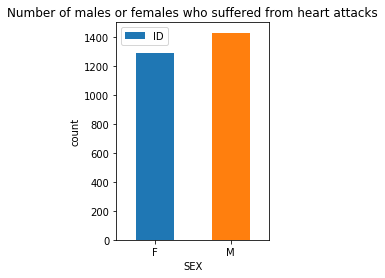

In [11]:
plt.subplot(1,2,2)
df[df['AMI_FLAG']==1].groupby('SEX_CD').count()['ID'].plot.bar(legend=True)
plt.xlabel("SEX")
plt.ylabel("count")
plt.title("Number of males or females who suffered from heart attacks")
plt.xticks(rotation=0)
plt.show()

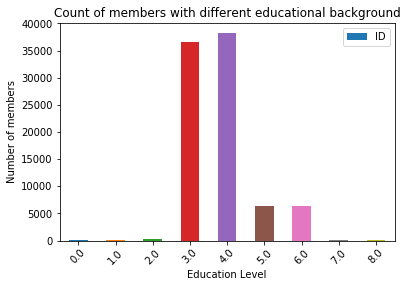

In [12]:
df.groupby('Education_level').count()['ID'].plot.bar(legend=True)
plt.xlabel("Education Level")
plt.ylabel("Number of members")
plt.title("Count of members with different educational background")
plt.xticks(rotation=45)
plt.show()

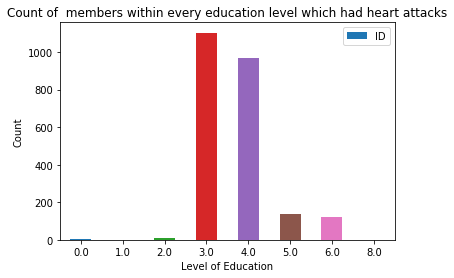

In [13]:
df[df['AMI_FLAG']==1].groupby('Education_level').count()['ID'].plot.bar(legend=True)
plt.xlabel("Level of Education")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Count of  members within every education level which had heart attacks")
plt.show()

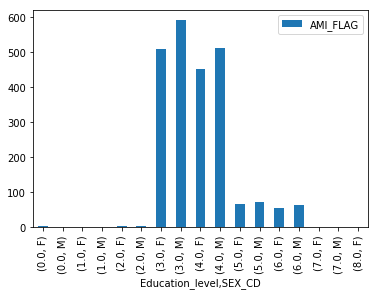

In [14]:
pd.pivot_table(df,index=['Education_level','SEX_CD'],values='AMI_FLAG',aggfunc=np.sum).plot.bar(stacked=True)



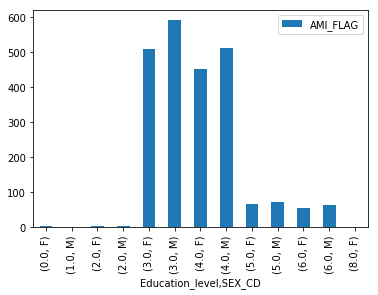

In [15]:
pd.pivot_table(df[df['AMI_FLAG']==1],index=['Education_level','SEX_CD'],values='AMI_FLAG',aggfunc=np.sum).plot.bar(stacked=True)


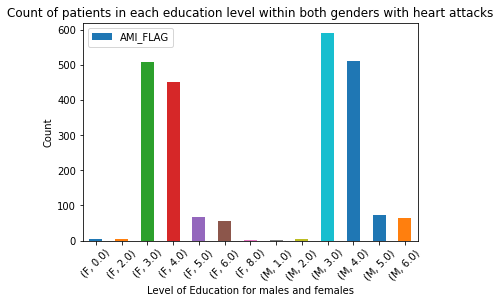

In [16]:
df[df['AMI_FLAG']==1].groupby(['SEX_CD','Education_level']).count()['AMI_FLAG'].plot.bar(stacked=True,legend=True)
plt.xlabel("Level of Education for males and females")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Count of patients in each education level within both genders with heart attacks")
plt.show()

In [17]:
l=list(d.keys())

In [18]:
d

{'SEX_CD': 30,
 'ESRD_IND': 32,
 'HOSPICE_IND': 32,
 'ORIG_REAS_ENTITLE_CD': 30,
 'PCP_ASSIGNMENT': 157,
 'DUAL': 30,
 'INSTITUTIONAL': 30,
 'LIS': 30,
 'MCO_HLVL_PLAN_CD': 33,
 'MCO_PROD_TYPE_CD': 33,
 'Diab_Type': 64693,
 'Dwelling_Type': 12179,
 'Education_level': 12179,
 'Length_residence': 12179,
 'Est_BMI_decile': 12179,
 'Num_person_household': 12179,
 'College': 12179,
 'Online_purchaser': 12179,
 'Online_User': 12179,
 'Pct_above_poverty_line': 12179,
 'Pct_below_poverty_line': 12179,
 'Decile_struggle_Med_lang': 25215,
 'Home_value': 12179,
 'Est_Net_worth': 12179,
 'Est_income': 12179,
 'Index_Health_ins_engage': 12179,
 'Index_Health_ins_influence': 12179,
 'Population_density_centile_ST': 12179,
 'Population_density_centile_US': 12179}

In [19]:
df.shape

(100000, 448)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 448 entries, ID to STATIN_ELIG
dtypes: float64(20), int64(417), object(11)
memory usage: 341.8+ MB


In [21]:
df.head()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,ORIG_REAS_ENTITLE_CD,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
0,1,77,F,0,N,N,0.0,0.424,0.402,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0
1,2,49,F,0,N,N,1.0,2.879,1.159,ATTRIBUTED,...,0,0,0,0,0,0,1,0,0,1
2,3,75,F,0,N,N,0.0,0.638,0.568,MEMBER SELECTED,...,1,0,0,0,0,1,1,1,0,1
3,4,68,M,0,N,N,0.0,0.584,0.886,MEMBER SELECTED,...,1,1,0,0,1,1,1,1,1,1
4,5,81,F,0,N,N,1.0,1.242,1.212,MEMBER SELECTED,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Identifying number of unique values in each columns
k={}
for i in df.columns:
    k[i]=df[i].nunique()

In [23]:
df.groupby('RX_THER_01_YR2016').count()['ID']

RX_THER_01_YR2016
0     81575
1     12727
2      3770
3      1150
4       410
5       185
6        79
7        35
8        25
9        15
10        9
11        6
12        4
13        4
14        1
15        1
16        2
20        1
22        1
Name: ID, dtype: int64

In [24]:
df.groupby('ORIG_REAS_ENTITLE_CD').count()

,ID,AGE,SEX_CD,AMI_FLAG,ESRD_IND,HOSPICE_IND,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR,PCP_ASSIGNMENT,DUAL,...,COL,COL_GAP,AMM,AMM_GAP,DIAB_PASS,ACE_PASS,STATIN_PASS,ACE_ELIG,DIAB_ELIG,STATIN_ELIG
ORIG_REAS_ENTITLE_CD,,,,,,,,,,,,,,,,,,,,,
0.0,71114,71114,71114,71114,71112,71112,71114,71114,71031,71114,...,71114,71114,71114,71114,71114,71114,71114,71114,71114,71114
1.0,28790,28790,28790,28790,28790,28790,28790,28790,28747,28790,...,28790,28790,28790,28790,28790,28790,28790,28790,28790,28790
2.0,60,60,60,60,60,60,60,60,59,60,...,60,60,60,60,60,60,60,60,60,60
3.0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


Text(0.5,1,'Age dependency on heart attacks')

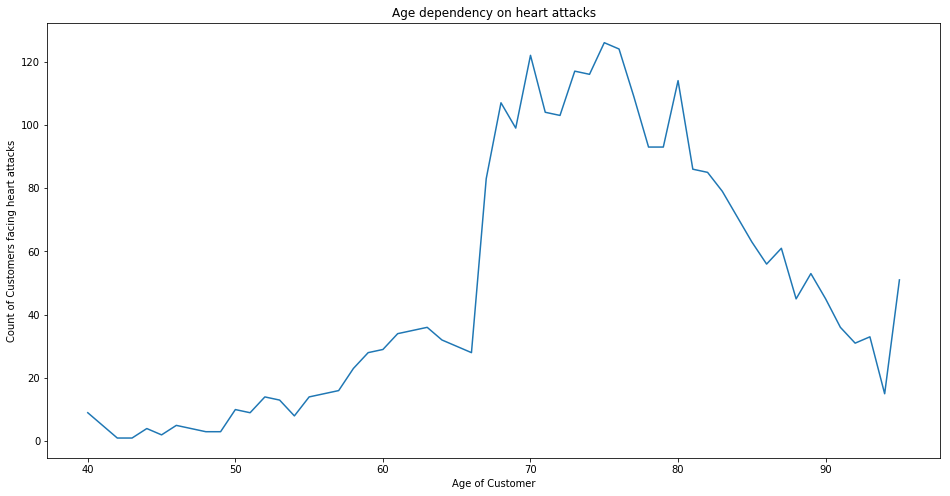

In [25]:
#Age Vs Heart attacks relationships
df[df['AMI_FLAG']==1].groupby('AGE').count()['ID'].plot(figsize=(16,8))
plt.xlabel("Age of Customer")
plt.ylabel("Count of Customers facing heart attacks")
plt.title("Age dependency on heart attacks")

(array([0, 1]), <a list of 2 Text xticklabel objects>)

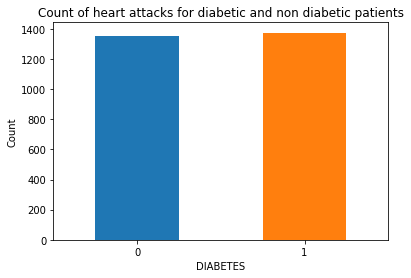

In [26]:
df[df['AMI_FLAG']==1].groupby('DIABETES').count()['ID'].plot.bar()
plt.ylabel("Count")
plt.title("Count of heart attacks for diabetic and non diabetic patients")
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

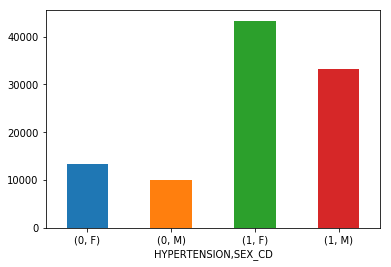

In [27]:
df.groupby(['HYPERTENSION','SEX_CD']).count()['ID'].plot.bar()
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

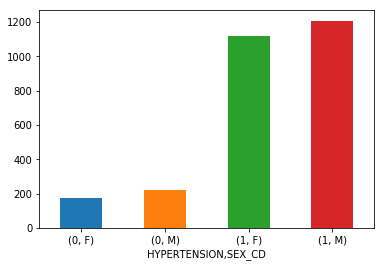

In [28]:
df[df['AMI_FLAG']==1].groupby(['HYPERTENSION','SEX_CD']).count()['ID'].plot.bar()
plt.xticks(rotation=0)

In [29]:
t=df.groupby(['Education_level','SEX_CD']).count()['ID']

Text(0.5,1,'Count by Education Level and gender')

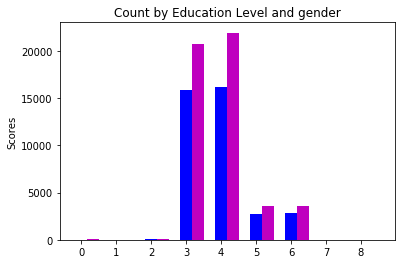

In [30]:
N=len(df.groupby('Education_level'))
men=[]
women=[]
for j in range(0,N):
    women.append(t.loc[j][0])
    try:
        men.append(t.loc[j][1])
        
    except:
        men.append(0)
men_means = tuple(men)
women_means = tuple(women)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1=ax.bar(ind,men_means,color='b',width=width)
rects2=ax.bar(ind+width,women_means,color='m',width=width)
#rects1 = ax.bar(ind, men_means, width, color='r')
plt.xticks(ind)
ax.set_ylabel('Scores')
ax.set_title('Count by Education Level and gender')

In [31]:
df.columns[0:50]

Index(['ID', 'AGE', 'SEX_CD', 'AMI_FLAG', 'ESRD_IND', 'HOSPICE_IND',
       'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'PCP_ASSIGNMENT', 'DUAL', 'INSTITUTIONAL',
       'LIS', 'MCO_HLVL_PLAN_CD', 'MCO_PROD_TYPE_CD', 'CON_VISIT_04_Q01',
       'CON_VISIT_04_Q02', 'CON_VISIT_04_Q03', 'CON_VISIT_04_Q04',
       'CON_VISIT_21_Q01', 'CON_VISIT_21_Q02', 'CON_VISIT_21_Q03',
       'CON_VISIT_03_Q02', 'CON_VISIT_03_Q04', 'CON_VISIT_05_Q02',
       'CON_VISIT_05_Q04', 'CON_VISIT_09_Q02', 'CON_VISIT_10_Q02',
       'CON_VISIT_18_Q02', 'CON_VISIT_19_Q04', 'CON_VISIT_23_Q02',
       'CON_VISIT_24_Q02', 'CON_VISIT_30_Q01', 'CON_VISIT_30_Q02',
       'CON_VISIT_30_Q04', 'CON_VISIT_32_Q02', 'CON_VISIT_33_Q04',
       'CON_VISIT_06_Q01', 'CON_VISIT_06_Q02', 'CON_VISIT_06_Q03',
       'CON_VISIT_10_Q01', 'CON_VISIT_19_Q03', 'CON_VISIT_33_Q02',
       'CON_VISIT_08_Q02', 'CON_VISIT_10_Q03', 'CON_VISIT_10_Q04',
       'CON_VISIT_24_Q04', 'CON_VISIT_08_Q01', 'CON_

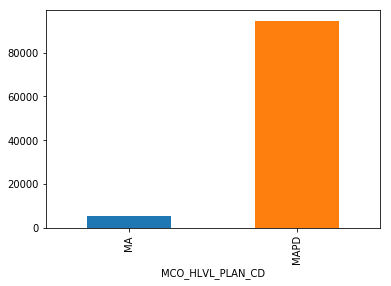

In [32]:
df.groupby('MCO_HLVL_PLAN_CD').count()['ID'].plot.bar()

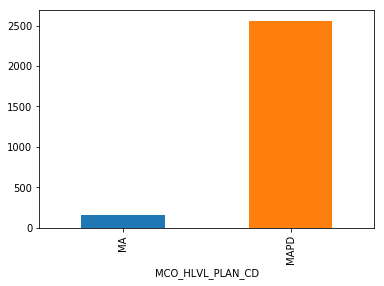

In [33]:
df[df['AMI_FLAG']==1].groupby('MCO_HLVL_PLAN_CD').count()['ID'].plot.bar()

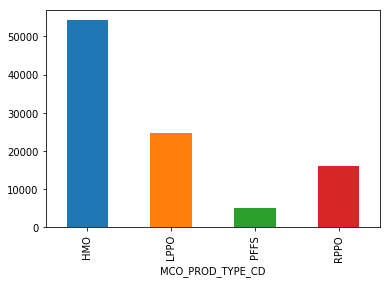

In [34]:
df.groupby('MCO_PROD_TYPE_CD').count()['ID'].plot.bar()

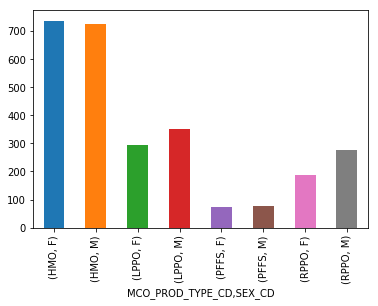

In [35]:
df[df['AMI_FLAG']==1].groupby(['MCO_PROD_TYPE_CD','SEX_CD']).count()['ID'].plot.bar()

In [36]:
#df[df['AMI_FLAG']==1].count() #2726

In [37]:
df[['RECON_MA_RISK_SCORE_NBR','RECON_RX_RISK_SCORE_NBR']].corr()

,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR
RECON_MA_RISK_SCORE_NBR,1.00000,0.52947
RECON_RX_RISK_SCORE_NBR,0.52947,1.00000


In [38]:
df[['CON_VISIT_01_Q01','CON_VISIT_01_Q02','CON_VISIT_01_Q03','CON_VISIT_01_Q04']].corr()

,CON_VISIT_01_Q01,CON_VISIT_01_Q02,CON_VISIT_01_Q03,CON_VISIT_01_Q04
CON_VISIT_01_Q01,1.000000,0.249303,0.126962,0.113894
CON_VISIT_01_Q02,0.249303,1.000000,0.320167,0.143733
CON_VISIT_01_Q03,0.126962,0.320167,1.000000,0.264533
CON_VISIT_01_Q04,0.113894,0.143733,0.264533,1.000000


In [39]:
df.columns

Index(['ID', 'AGE', 'SEX_CD', 'AMI_FLAG', 'ESRD_IND', 'HOSPICE_IND',
       'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'PCP_ASSIGNMENT',
       ...
       'COL', 'COL_GAP', 'AMM', 'AMM_GAP', 'DIAB_PASS', 'ACE_PASS',
       'STATIN_PASS', 'ACE_ELIG', 'DIAB_ELIG', 'STATIN_ELIG'],
      dtype='object', length=448)

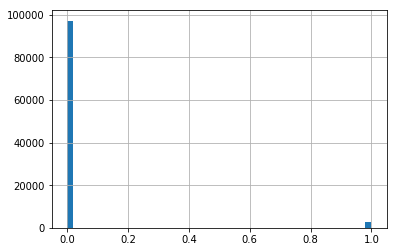

In [40]:
df['AMI_FLAG'].hist(bins=50)

In [41]:
df.dropna(axis=0,subset=['SEX_CD'],how='any',inplace=True)

In [42]:
df.dropna(axis=0,subset=['ESRD_IND'],how='any',inplace=True)

In [43]:
df.dropna(axis=0,subset=['HOSPICE_IND'],how='any',inplace=True)

In [44]:
df.dropna(axis=0,subset=['ORIG_REAS_ENTITLE_CD'],how='any',inplace=True)

In [45]:
df.dropna(axis=0,subset=['PCP_ASSIGNMENT'],how='any',inplace=True)

In [46]:
df.dropna(axis=0,subset=['DUAL'],how='any',inplace=True)

In [47]:
df.dropna(axis=0,subset=['INSTITUTIONAL'],how='any',inplace=True)

In [48]:
df.dropna(axis=0,subset=['LIS'],how='any',inplace=True)

In [49]:
df.dropna(axis=0,subset=['MCO_HLVL_PLAN_CD'],how='any',inplace=True)

In [50]:
df.dropna(axis=0,subset=['MCO_PROD_TYPE_CD'],how='any',inplace=True)

In [51]:
df.drop(axis=1,columns=['Diab_Type'],inplace=True)

In [52]:
df.drop(axis=1,columns=['Dwelling_Type'],inplace=True)

In [53]:
df.dropna(axis=0,subset=['Education_level'],how='any',inplace=True)

In [54]:
df.dropna(axis=0,subset=['Length_residence'],how='any',inplace=True)

In [55]:
df.dropna(axis=0,subset=['Est_BMI_decile'],how='any',inplace=True)

In [56]:
df.dropna(axis=0,subset=['Num_person_household'],how='any',inplace=True)

In [57]:
df.dropna(axis=0,subset=['College'],how='any',inplace=True)

In [58]:
df.dropna(axis=0,subset=['Online_purchaser'],how='any',inplace=True)

In [59]:
df.dropna(axis=0,subset=['Online_User'],how='any',inplace=True)


In [60]:
df.dropna(axis=0,subset=['Pct_above_poverty_line'],how='any',inplace=True)


In [61]:
df.dropna(axis=0,subset=['Pct_below_poverty_line'],how='any',inplace=True)

In [62]:
df.dropna(axis=0,subset=['Decile_struggle_Med_lang'],how='any',inplace=True)

In [63]:
df.dropna(axis=0,subset=['Home_value'],how='any',inplace=True)

In [64]:
df.dropna(axis=0,subset=['Est_Net_worth'],how='any',inplace=True)

In [65]:
df.dropna(axis=0,subset=['Est_income'],how='any',inplace=True)

In [66]:
df.dropna(axis=0,subset=['Index_Health_ins_engage'],how='any',inplace=True)

In [67]:
df.dropna(axis=0,subset=['Index_Health_ins_influence'],how='any',inplace=True)

In [68]:
df.dropna(axis=0,subset=['Population_density_centile_ST'],how='any',inplace=True)

In [69]:
df.dropna(axis=0,subset=['Population_density_centile_US'],how='any',inplace=True)

In [70]:
l=df.columns[df.isna().any()].tolist()

In [71]:
l

[]

In [72]:
#df.select_dtypes(include='object').columns

In [73]:
#df=pd.get_dummies(df)

In [74]:
df.select_dtypes(include='object').columns

Index(['SEX_CD', 'ESRD_IND', 'HOSPICE_IND', 'PCP_ASSIGNMENT', 'DUAL',
       'INSTITUTIONAL', 'LIS', 'MCO_HLVL_PLAN_CD', 'MCO_PROD_TYPE_CD'],
      dtype='object')

In [75]:
#Tranforming continuous columns "CON_VISIT_0XXXX" into categorical levels
#for i in range(1,34):
#    try:    
#        if i<10:
#            s='CON_VISIT_0' + str(i)+'_Q0'
#            for j in range(1,5):
#                col=s+str(j)
#                #print(col)
#                df.loc[df[col]>1,col]=2
#                df[col]=df[col].astype('object')
#        else:
#            s='CON_VISIT_' + str(i)+'_Q0'
#            for j in range(1,5):
#                col=s+str(j)
#                #print(col)
#                df.loc[df[col]>1,col]=2
#               df[col]=df[col].astype('object')
#    except:
#        continue


In [76]:
#df['CON_VISIT_01']=df['CON_VISIT_01_Q01']+df['CON_VISIT_01_Q02']+df['CON_VISIT_01_Q03']+df['CON_VISIT_01_Q04']

In [77]:
colnames=[]
for i in range(1,34):
    if i <10:
        s='CON_VISIT_0' + str(i)
        colnames.append(s)
        df[s]=0
        t=s+'_Q0'
        for j in range(1,5):
            try:
                col1=t+str(j)
                df[s]=df[s]+df[col1]
                df.drop(axis=1,columns=col1,inplace=True)
            except:
                continue
    else:
        s='CON_VISIT_' + str(i)
        colnames.append(s)
        df[s]=0
        t=s+'_Q0'
        for j in range(1,5):
            try:
                col1=t+str(j)
                df[s]=df[s]+df[col1]
                df.drop(axis=1,columns=col1,inplace=True)
            except:
                continue

In [78]:
df.drop(axis=1,columns='CON_VISIT_29',inplace=True)

In [79]:
#df['']

In [80]:
colnames=[]
for i in range(1,100):
    if i <10:
        s='POT_VISIT_0' + str(i)
        colnames.append(s)
        df[s]=0
        t=s+'_Q0'
        for j in range(1,5):
            try:
                col1=t+str(j)
                df[s]=df[s]+df[col1]
                df.drop(axis=1,columns=col1,inplace=True)
            except:
                continue
    else:
        s='POT_VISIT_' + str(i)
        colnames.append(s)
        df[s]=0
        t=s+'_Q0'
        for j in range(1,5):
            try:
                col1=t+str(j)
                df[s]=df[s]+df[col1]
                df.drop(axis=1,columns=col1,inplace=True)
            except:
                continue

In [81]:
filter_col = [col for col in df if col.startswith('POT_VISIT')]
for col in filter_col:
    if df[col].nunique()==1:
        df.drop(axis=1,columns=col,inplace=True)
    else:
        continue

In [82]:
df['RES_INF'].unique()

array([0, 1], dtype=int64)

In [83]:
df.select_dtypes(include='int64').columns[100:150]

Index(['RES_ALG', 'RES_AST', 'RES_COPD', 'RES_FAIL', 'RES_INF', 'DIABETES',
       'Diab_Complications', 'PREDIABETES', 'HYPERTENSION', 'HYPERLIPID',
       'RENAL', 'CKD', 'ESRD', 'MUSCUL_OTH', 'MUSCUL_BN', 'OSTEO', 'ARTH',
       'CDC', 'CDC_HBATEST_GAP', 'CDC_HBAPOOR_GAP', 'CDC_NPH_GAP',
       'CDC_EYE_GAP', 'BCS', 'BCS_GAP', 'COL', 'COL_GAP', 'AMM', 'AMM_GAP',
       'DIAB_PASS', 'ACE_PASS', 'STATIN_PASS', 'ACE_ELIG', 'DIAB_ELIG',
       'STATIN_ELIG', 'CON_VISIT_01', 'CON_VISIT_02', 'CON_VISIT_03',
       'CON_VISIT_04', 'CON_VISIT_05', 'CON_VISIT_06', 'CON_VISIT_07',
       'CON_VISIT_08', 'CON_VISIT_09', 'CON_VISIT_10', 'CON_VISIT_11',
       'CON_VISIT_12', 'CON_VISIT_13', 'CON_VISIT_14', 'CON_VISIT_15',
       'CON_VISIT_16'],
      dtype='object')

In [84]:
df['STATIN_PASS'].unique()

array([0, 1], dtype=int64)

In [85]:
#df.select_dtypes(include='int64').columns[50:100]

In [86]:
df.select_dtypes(include='int64').columns

Index(['ID', 'AGE', 'AMI_FLAG', 'RX_THER_17_YR2016', 'RX_THER_36_YR2016',
       'RX_THER_42_YR2016', 'RX_THER_44_YR2016', 'RX_THER_58_YR2016',
       'RX_THER_65_YR2016', 'RX_THER_90_YR2016',
       ...
       'POT_VISIT_56', 'POT_VISIT_57', 'POT_VISIT_60', 'POT_VISIT_61',
       'POT_VISIT_62', 'POT_VISIT_65', 'POT_VISIT_71', 'POT_VISIT_72',
       'POT_VISIT_81', 'POT_VISIT_99'],
      dtype='object', length=208)

In [87]:
#pd.get_dummies(df,columns=df.select_dtypes(include='object').columns)
#df.dtypes

In [88]:
df.get_dtype_counts()

int64      208
object       9
float64     20
dtype: int64

In [89]:
df.select_dtypes(include='object').columns

Index(['SEX_CD', 'ESRD_IND', 'HOSPICE_IND', 'PCP_ASSIGNMENT', 'DUAL',
       'INSTITUTIONAL', 'LIS', 'MCO_HLVL_PLAN_CD', 'MCO_PROD_TYPE_CD'],
      dtype='object')

In [90]:
df.shape

(74670, 237)

In [91]:
df=pd.get_dummies(df)

In [93]:
df.shape

(74670, 249)

In [94]:
t=list(df.columns)
tmp=df.columns[df.columns.get_loc('AMI_FLAG')]

t.append(tmp)


del t[df.columns.get_loc('AMI_FLAG')]

df=df[t]

In [95]:
df.select_dtypes(include='uint8').columns

Index(['SEX_CD_F', 'SEX_CD_M', 'ESRD_IND_N', 'ESRD_IND_Y', 'HOSPICE_IND_N',
       'HOSPICE_IND_Y', 'PCP_ASSIGNMENT_ATTRIBUTED',
       'PCP_ASSIGNMENT_MEMBER SELECTED', 'PCP_ASSIGNMENT_UNATTRIBUTED',
       'DUAL_N', 'DUAL_Y', 'INSTITUTIONAL_N', 'INSTITUTIONAL_Y', 'LIS_N',
       'LIS_Y', 'MCO_HLVL_PLAN_CD_MA', 'MCO_HLVL_PLAN_CD_MAPD',
       'MCO_PROD_TYPE_CD_HMO', 'MCO_PROD_TYPE_CD_LPPO',
       'MCO_PROD_TYPE_CD_PFFS', 'MCO_PROD_TYPE_CD_RPPO'],
      dtype='object')

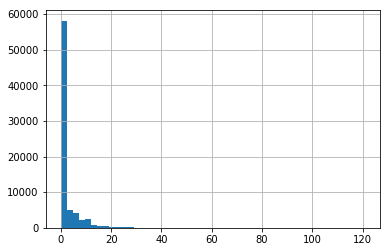

In [96]:
df[df.select_dtypes(include='int64').columns[19]].hist(bins=50)

In [97]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#scaler.fit(X_test)
#X_test = scaler.transform(X_test)
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#X_train=preprocessing.scale(X_train)
#X_test=preprocessing.scale(X_test)

from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

In [98]:
for col in df.select_dtypes('int64').columns:
    if col=='ID':
        continue
    else:
        max_value=np.max(df[col])
        min_value=np.min(df[col])
        df[col]=(df[col]-min_value)/(max_value-min_value)


In [99]:
for col in df.select_dtypes('float64').columns:
    if col=='ID':
        continue
    else:
        max_value=np.max(df[col])
        min_value=np.min(df[col])
        df[col]=(df[col]-min_value)/(max_value-min_value)

In [110]:
df.select_dtypes(include='float64').columns

Index(['AGE', 'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'RX_THER_17_YR2016', 'RX_THER_36_YR2016',
       'RX_THER_42_YR2016', 'RX_THER_44_YR2016', 'RX_THER_58_YR2016',
       'RX_THER_65_YR2016',
       ...
       'POT_VISIT_57', 'POT_VISIT_60', 'POT_VISIT_61', 'POT_VISIT_62',
       'POT_VISIT_65', 'POT_VISIT_71', 'POT_VISIT_72', 'POT_VISIT_81',
       'POT_VISIT_99', 'AMI_FLAG'],
      dtype='object', length=227)

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


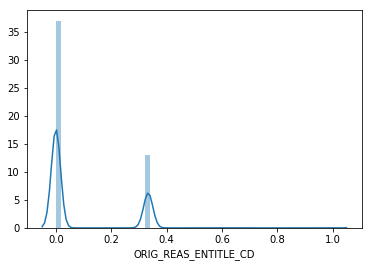

In [112]:
sns.distplot(df['ORIG_REAS_ENTITLE_CD'])

In [115]:
df[df['AMI_FLAG']==1].groupby('ORIG_REAS_ENTITLE_CD').count()['ID']
#df['ORIG_REAS_ENTITLE_CD'].nunique()

ORIG_REAS_ENTITLE_CD
0.000000    1392
0.333333     595
0.666667       2
Name: ID, dtype: int64

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


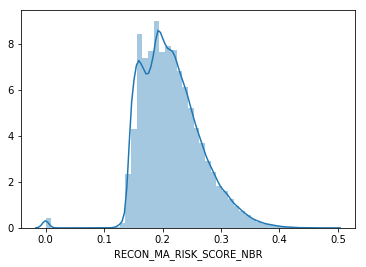

In [130]:
sns.distplot(np.power(np.log(np.sqrt(np.power((df[df.select_dtypes(include='float64').columns[2]]+1),1./3))),1./3))#.hist(bins=100)
#sns.distplot(np.power(np.log(df[df.select_dtypes(include='float64').columns[2]]+1)),1./3)

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


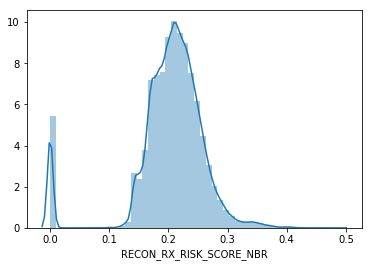

In [131]:
sns.distplot(np.power(np.log(np.sqrt(np.power((df[df.select_dtypes(include='float64').columns[3]]+1),1./3))),1./3))#.hist(bins=100)


C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


RX_THER_17_YR2016
0.0    1605
0.2     317
0.4      56
0.6      11
Name: ID, dtype: int64

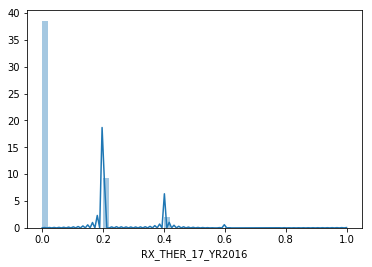

In [142]:
sns.distplot(df[df.select_dtypes(include='float64').columns[4]])#.hist(bins=100)
df[df['AMI_FLAG']==1].groupby('RX_THER_17_YR2016').count()['ID']
#df[df.select_dtypes(include='float64').columns[4]].value_counts()


C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


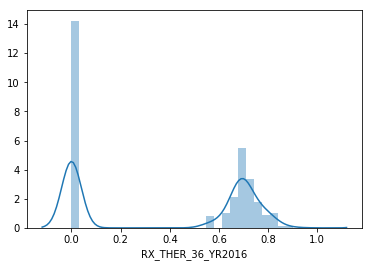

In [150]:
sns.distplot(np.power(df[df.select_dtypes(include='float64').columns[5]],1./7))#.hist(bins=100)


C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


21

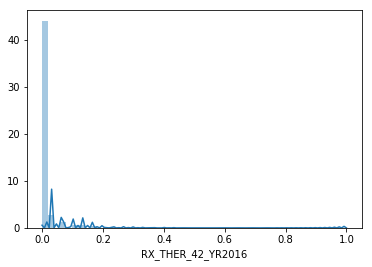

In [158]:
sns.distplot(df[df.select_dtypes(include='float64').columns[6]])#.hist(bins=100)
df[df.select_dtypes(include='float64').columns[6]].nunique()
#df[df['AMI_FLAG']==1].groupby('RX_THER_42_YR2016').count()['ID']

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


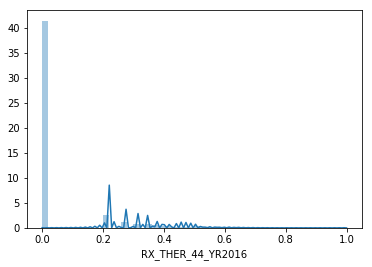

In [169]:
#sns.distplot(df[df.select_dtypes(include='float64').columns[7]])#.hist(bins=100)
sns.distplot(np.power(df[df.select_dtypes(include='float64').columns[7]],1./3))

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


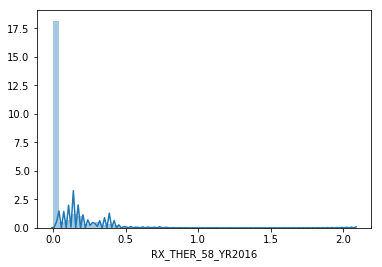

In [190]:
sns.distplot(np.log(np.power(np.power(df[df.select_dtypes(include='float64').columns[8]]+1,3),1)))

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


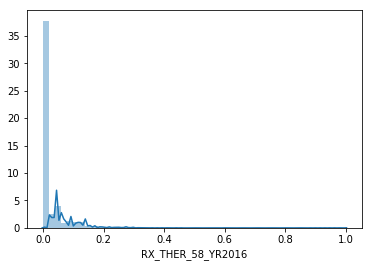

In [207]:
sns.distplot(df[df.select_dtypes(include='float64').columns[8]])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#sns.distplot(df[df.select_dtypes(include='float64').columns[26]])
for i in range(0,len(df.select_dtypes(include='float64').columns)):
    #sns_plot=sns.distplot(df[df.select_dtypes(include='float64').columns[i]])
    z=df[df.select_dtypes(include='float64').columns[i]].hist(bins=100)
    path='C:\\Users\\gandh\\Downloads\\Datasets\\humana\\graphs\\'+str(df.select_dtypes(include='float64').columns[i])
    #sns_plot.savefig(path+".png")
    plt.savefig(path+".png")

KeyboardInterrupt: 

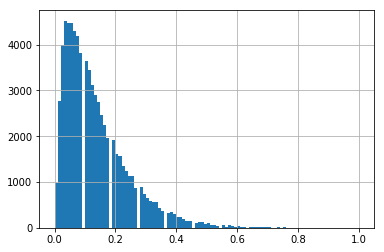

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


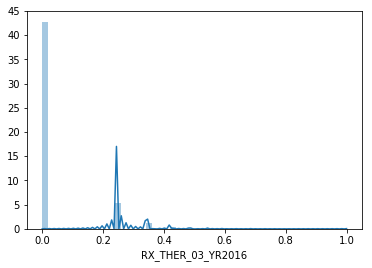

In [239]:
sns.distplot(np.power(df[df.select_dtypes(include='float64').columns[32]],1./2))

In [100]:
X=df.iloc[:,1:len(df.columns)-1]
y=df.iloc[:,-1]

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
logreg=LogisticRegression()

In [104]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
predictions=logreg.predict(X_test)

In [106]:
confusion_matrix(y_test,predictions)

array([[14543,     0],
       [  391,     0]], dtype=int64)

In [384]:
print("precision : ",precision_score(y_test,predictions))
print("Recall : ", recall_score(y_test,predictions))
print("Accuracy : ",accuracy_score(y_test,predictions))

precision :  0.0
Recall :  0.0
Accuracy :  0.9738181331190572


C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


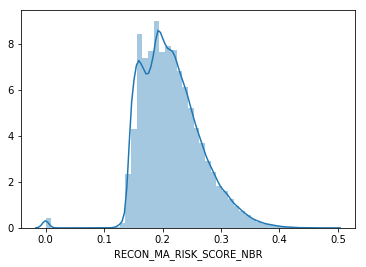

In [522]:
sns.distplot(np.power(np.log(np.sqrt(np.power((df[df.select_dtypes(include='float64').columns[2]]+1),1./3))),1./3))#.hist(bins=100)

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


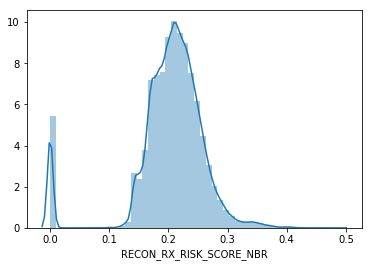

In [538]:
sns.distplot(np.power(np.log(np.sqrt(np.power((df[df.select_dtypes(include='float64').columns[3]]+1),1./3))),1./3))#.hist(bins=100)

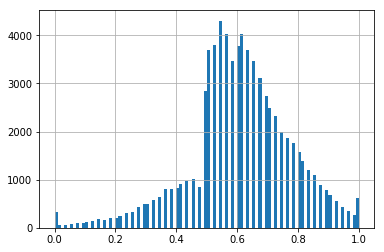

In [545]:
df[df.select_dtypes(include='float64').columns[0]].hist(bins=100)

In [546]:
#df.select_dtypes(include='float64').columns[47]
#df[df.select_dtypes(include='float64').columns[52]].value_counts()
#df[df.select_dtypes(include='float64').columns[56]].value_counts()
#df[df.select_dtypes(include='float64').columns[68]]
df.select_dtypes(include='float64').columns[1]

'ORIG_REAS_ENTITLE_CD'

In [547]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
predictions=clf.predict(X_test)
confusion_matrix(y_test,predictions)

array([[14532,    11],
       [  391,     0]], dtype=int64)

In [548]:
print("precision : ",precision_score(y_test,predictions))
print("Recall : ", recall_score(y_test,predictions))
print("Accuracy : ",accuracy_score(y_test,predictions))

precision :  0.0
Recall :  0.0
Accuracy :  0.9730815588589795


In [549]:
from sklearn import tree

In [550]:
clf_tree=tree.DecisionTreeClassifier(random_state=42)

In [551]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [552]:
predictions=clf_tree.predict(X_test)

In [553]:
confusion_matrix(y_test,predictions)

array([[14060,   483],
       [  355,    36]], dtype=int64)

In [554]:
print("precision : ",precision_score(y_test,predictions))
print("Recall : ", recall_score(y_test,predictions))
print("Accuracy : ",accuracy_score(y_test,predictions))

precision :  0.06936416184971098
Recall :  0.09207161125319693
Accuracy :  0.9438864336413553


In [555]:
#Complement NB google it

In [556]:
import imblearn

In [557]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

In [559]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)


In [560]:
X_train,X_test,y_train,y_test=train_test_split(X_ros,y_ros,test_size=0.2,random_state=42)

In [561]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [562]:
predictions=clf.predict(X_test)

In [563]:
confusion_matrix(y_test,predictions)

array([[14432,    10],
       [14541,    90]], dtype=int64)

In [564]:
print("precision : ",precision_score(y_test,predictions))
print("Recall : ", recall_score(y_test,predictions))
print("Accuracy : ",accuracy_score(y_test,predictions))

precision :  0.9
Recall :  0.006151322534344884
Accuracy :  0.4995012554603928


In [565]:
from sklearn.ensemble import GradientBoostingClassifier

In [566]:
gb=GradientBoostingClassifier()

In [567]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [568]:
predictions=gb.predict(X_test)

In [569]:
confusion_matrix(y_test,predictions)

array([[10726,  3716],
       [ 4184, 10447]], dtype=int64)

In [570]:
print("precision : ",precision_score(y_test,predictions))
print("Recall : ", recall_score(y_test,predictions))
print("Accuracy : ",accuracy_score(y_test,predictions))

precision :  0.7376262091364824
Recall :  0.7140318501811223
Accuracy :  0.7282702163519417


In [155]:
df[['RECON_MA_RISK_SCORE_NBR','RECON_RX_RISK_SCORE_NBR']].corr()

,RECON_MA_RISK_SCORE_NBR,RECON_RX_RISK_SCORE_NBR
RECON_MA_RISK_SCORE_NBR,1.000000,0.534363
RECON_RX_RISK_SCORE_NBR,0.534363,1.000000


In [571]:
#X.iloc[:,sorted_idx[0:200]].columns

In [572]:
#X=X.iloc[:,sorted_idx[0:300]]

In [573]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [574]:
sns.set(color_codes=True)


C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


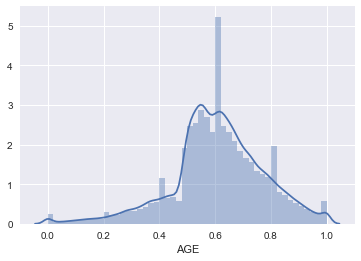

In [577]:
sns.distplot(X['AGE'])

In [578]:
X['RECON_MA_RISK_SCORE_NBR']=X['RECON_MA_RISK_SCORE_NBR']+np.mean(X['RECON_MA_RISK_SCORE_NBR'])

In [580]:
X.columns

Index(['AGE', 'ORIG_REAS_ENTITLE_CD', 'RECON_MA_RISK_SCORE_NBR',
       'RECON_RX_RISK_SCORE_NBR', 'RX_THER_17_YR2016', 'RX_THER_36_YR2016',
       'RX_THER_42_YR2016', 'RX_THER_44_YR2016', 'RX_THER_58_YR2016',
       'RX_THER_65_YR2016',
       ...
       'INSTITUTIONAL_N', 'INSTITUTIONAL_Y', 'LIS_N', 'LIS_Y',
       'MCO_HLVL_PLAN_CD_MA', 'MCO_HLVL_PLAN_CD_MAPD', 'MCO_PROD_TYPE_CD_HMO',
       'MCO_PROD_TYPE_CD_LPPO', 'MCO_PROD_TYPE_CD_PFFS',
       'MCO_PROD_TYPE_CD_RPPO'],
      dtype='object', length=247)

In [582]:
#sns.distplot(np.sqrt(np.log(df['RECON_RX_RISK_SCORE_NBR']+np.nanmean(df['RECON_RX_RISK_SCORE_NBR']))))

In [584]:
#sns.distplot(np.log(np.log(df['RECON_MA_RISK_SCORE_NBR']+np.nanmean(df['RECON_MA_RISK_SCORE_NBR']))))

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


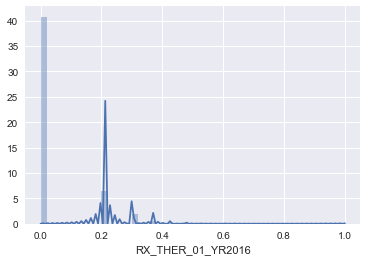

In [585]:
sns.distplot(np.sqrt(df['RX_THER_01_YR2016']))

In [586]:
#X=df.iloc[:,1:len(df.columns)-1]
#y=df.iloc[:,-1]

In [587]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf_tree=tree.DecisionTreeClassifier()

clf_tree.fit(X_train,y_train)

predictions=clf_tree.predict(X_test)

confusion_matrix(y_test,predictions)

array([[13910,   532],
       [    0, 14631]], dtype=int64)

In [588]:
print("precision : ",precision_score(y_test,predictions))
print("Recall : ", recall_score(y_test,predictions))
print("Accuracy : ",accuracy_score(y_test,predictions))

precision :  0.9649145947371892
Recall :  1.0
Accuracy :  0.9817012348226877


In [589]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions=gnb.predict(X_test)

In [590]:
confusion_matrix(y_test,predictions)

array([[  455, 13987],
       [  214, 14417]], dtype=int64)

In [591]:
print("precision : ",precision_score(y_test,predictions))
print("Recall : ", recall_score(y_test,predictions))
print("Accuracy : ",accuracy_score(y_test,predictions))

precision :  0.5075693564286721
Recall :  0.985373521973891
Accuracy :  0.5115399167612561


In [592]:
from sklearn.metrics import roc_auc_score

In [593]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [594]:
predictions=lda.predict(X_test)

In [595]:
confusion_matrix(y_test,predictions)

array([[10727,  3715],
       [ 4820,  9811]], dtype=int64)

In [596]:
print("precision : ",precision_score(y_test,predictions))
print("Recall : ", recall_score(y_test,predictions))
print("Accuracy : ",accuracy_score(y_test,predictions))

precision :  0.7253437823451131
Recall :  0.6705625042717518
Accuracy :  0.706428645134661


In [597]:
#df.select_dtypes(include='int64').columns

In [598]:
#Work on Gaussian Naive bayes and Linear Discriminant analysis to improve precision and recall score

In [599]:
from sklearn.ensemble import RandomForestClassifier

In [600]:
clf_rf = RandomForestClassifier(n_estimators=100,max_depth=12,random_state=0)

In [601]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [602]:
predictions=clf_rf.predict(X_test)

In [603]:
confusion_matrix(y_test,predictions)

array([[13243,  1199],
       [ 1765, 12866]], dtype=int64)

In [604]:
print("precision : ",precision_score(y_test,predictions))
print("Recall : ", recall_score(y_test,predictions))
print("Accuracy : ",accuracy_score(y_test,predictions))

precision :  0.9147529328119446
Recall :  0.8793657302986809
Accuracy :  0.8980497368692602


In [609]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", penalty="l2",random_state=1,max_iter=15)
clf.fit(X_train, y_train)
predictions=clf.predict(X_test)
confusion_matrix(y_test,predictions)

array([[11663,  2779],
       [ 6201,  8430]], dtype=int64)

In [610]:
print("precision : ",precision_score(y_test,predictions))
print("Recall : ", recall_score(y_test,predictions))
print("Accuracy : ",accuracy_score(y_test,predictions))

precision :  0.752074226068338
Recall :  0.5761738773836375
Accuracy :  0.6911223471949919


In [611]:
from sklearn.ensemble import AdaBoostClassifier


In [612]:
clf = AdaBoostClassifier(n_estimators=100)

In [613]:
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [614]:
predictions=clf.predict(X_test)

In [615]:
print("precision : ",precision_score(y_test,predictions))
print("Recall : ", recall_score(y_test,predictions))
print("Accuracy : ",accuracy_score(y_test,predictions))

precision :  0.7272064186725018
Recall :  0.6814298407490944
Accuracy :  0.7110377326041344


In [224]:
#from sklearn.ensemble import BaggingClassifier

In [225]:
#clf_bagging=BaggingClassifier(n_estimators=100)

In [226]:
#clf_bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [227]:
#predictions=clf_bagging.predict(X_test)

In [228]:
#confusion_matrix(y_test,predictions)

array([[14397,    45],
       [    0, 14631]], dtype=int64)

precision :  0.9969337694194603
Recall :  1.0
Accuracy :  0.9984521721184604


In [230]:
from sklearn.ensemble import ExtraTreesClassifier

In [231]:
#clf_extratrees=ExtraTreesClassifier()

In [232]:
#clf_extratrees.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [233]:
#predictions=clf_extratrees.predict(X_test)

In [234]:
#confusion_matrix(y_test,predictions)

array([[14442,     0],
       [    0, 14631]], dtype=int64)

precision :  1.0
Recall :  1.0
Accuracy :  1.0


In [616]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [617]:
# Training classifiers
clf1 =DecisionTreeClassifier(max_depth=10)
#clf2 = KNeighborsClassifier(n_neighbors=7)
clf2=GradientBoostingClassifier(learning_rate=0.1,max_depth=10)
clf3 =LinearDiscriminantAnalysis()
eclf = VotingClassifier(n_jobs=-1,estimators=[('dt', clf1), ('gb', clf2),
                                    ('lda', clf3)],
                        voting='soft', weights=[1, 1, 1])

In [ ]:
#clf1.fit(X_train,y_train)
#clf2.fit(X_train,y_train)
#clf3.fit(X_train,y_train)
#eclf.fit(X_train,y_train)

In [239]:
#preds1=clf1.predict(X_test)
#preds2=clf2.predict(X_test)
#preds3=clf3.predict(X_test)
#preds4=eclf.predict(X_test)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [240]:
print("Confusion Matrix : " + "\n",confusion_matrix(y_test,preds1))
print("precision : ",precision_score(y_test,preds1))
print("Recall : ", recall_score(y_test,preds1))
print("Accuracy : ",accuracy_score(y_test,preds1))


NameError: name 'preds1' is not defined

In [246]:
print("Confusion Matrix : " + "\n",confusion_matrix(y_test,preds2))
print("precision : ",precision_score(y_test,preds2))
print("Recall : ", recall_score(y_test,preds2))
print("Accuracy : ",accuracy_score(y_test,preds2))


Confusion Matrix : 
 [[10770  3672]
 [ 4208 10423]]
precision :  0.7394820858460447
Recall :  0.712391497505297
Accuracy :  0.7289581398548481


In [247]:
print("Confusion Matrix : " + "\n",confusion_matrix(y_test,preds3))
print("precision : ",precision_score(y_test,preds3))
print("Recall : ", recall_score(y_test,preds3))
print("Accuracy : ",accuracy_score(y_test,preds3))


Confusion Matrix : 
 [[10725  3717]
 [ 4801  9830]]
precision :  0.7256219089097217
Recall :  0.6718611168067802
Accuracy :  0.7070133801121316


In [241]:
print("Confusion Matrix : " + "\n",confusion_matrix(y_test,preds4))
print("precision : ",precision_score(y_test,preds4))
print("Recall : ", recall_score(y_test,preds4))
print("Accuracy : ",accuracy_score(y_test,preds4))


Confusion Matrix : 
 [[13368  1074]
 [  496 14135]]
precision :  0.9293839174173187
Recall :  0.9660993780329438
Accuracy :  0.9459980050218416
